In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
dataset = pd.read_csv("Iris.csv")
X = dataset.iloc[:, [1,2,3, 4]].values #did not start from 0 because the first column contains the id column.
np.unique(dataset.Species)#method for checking the unique records in a variable. method 1
dataset['Species'].unique()#method for checking the unique records in a variable. method 2
y = dataset.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [20]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [82]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(y_pred,y_test)

# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species)) #dataframe of probabilities
#print(result)
#np.argmax(result.iloc[3,:]) 

predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]#index with location of max probabilities
predicted_names = [np.unique(dataset.Species)[i] for i in predictedt_index]#the species name associated with#the max probabilities index obtained above

result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=predicted_names)
#result.sample(10)
#print(result)

y_pred2=np.reshape(y_pred,(38,1))#reshape y_pred to a n*1 matrix
ys=pd.DataFrame(y_pred2,y_test).reset_index()#put y test and y pred in a dataframe
ys.columns
ys[(ys['index']!=ys[0])]#check which of the columns is not equal, only one is.

,index,0
37,Iris-versicolor,Iris-virginica


In [59]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


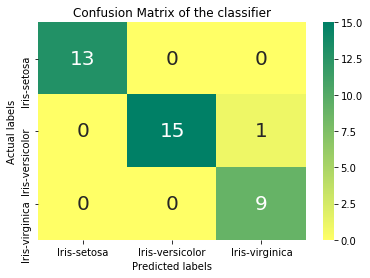

In [20]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [21]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [86]:
#getting the y pred using another method
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(y_pred,y_test)

# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species)) #dataframe of probabilities
#print(result)
#np.argmax(result.iloc[3,:]) 

# predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]#index with location of max probabilities
# predicted_names = [np.unique(dataset.Species)[i] for i in predictedt_index]#the species name associated with#the max probabilities index obtained above

y_pred2=np.reshape(y_pred,(38,1))#reshape y_pred to a n*1 matrix
#ys=pd.DataFrame(y_pred2).reset_index()#put y test and y pred in a dataframe
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred2)
result
#result.sample(10)
#print(result)


#ys[(ys['index']!=ys[0])]#check which of the columns is not equal, only one is.

,Test,Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
0,Iris-virginica,Iris-virginica,0.00,0.06,0.94
1,Iris-versicolor,Iris-versicolor,0.01,0.96,0.03
2,Iris-setosa,Iris-setosa,0.98,0.02,0.00
3,Iris-virginica,Iris-virginica,0.00,0.02,0.98
4,Iris-setosa,Iris-setosa,0.97,0.03,0.00
5,Iris-virginica,Iris-virginica,0.00,0.01,0.99
6,Iris-setosa,Iris-setosa,0.98,0.02,0.00
7,Iris-versicolor,Iris-versicolor,0.00,0.75,0.25
8,Iris-versicolor,Iris-versicolor,0.00,0.74,0.26
9,Iris-versicolor,Iris-versicolor,0.02,0.94,0.04


In [87]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


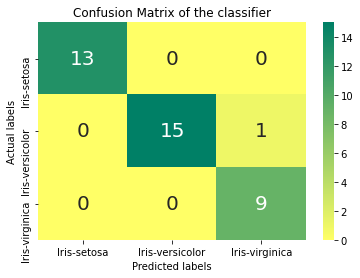

In [91]:
# confusion matrix sns heatmap 
#ax = plt.axes()
h=sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
# plt.title("Confusion Matrix of the classifier")
# plt.ylabel('Actual labels')
# plt.xlabel('Predicted labels')

h.set(xlabel='Predicted labels',ylabel='Actual labels',title="Confusion Matrix of the classifier")
plt.show()

In [92]:
print('Accuracy score',accuracy_score(y_test,y_pred))

Accuracy score 0.9736842105263158
